In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
database_path = ('removed for upload purposes')

engine = create_engine(f"{database_path}")
conn = engine.connect()
departments = pd.read_sql("SELECT * FROM departments", conn)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", conn)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", conn)
employees = pd.read_sql("SELECT * FROM employees", conn)
salaries = pd.read_sql("SELECT * FROM salaries", conn)
titles = pd.read_sql("SELECT * FROM titles", conn)

In [2]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   emp_no  300024 non-null  int64
 1   salary  300024 non-null  int64
dtypes: int64(2)
memory usage: 4.6 MB


In [3]:
# Create the bins in which Data will be held
bins = [39999.9, 59999.9, 79999.9, 99999.9, 119999.9, 139999.9]
group_names = ["40k-60k", "60k-80k", "80k-100k", "100k-120k", "120k+"]
salaries["Salary Group"] = pd.cut(salaries["salary"], bins, labels=group_names, include_lowest=True)
salary_count = salaries.groupby('Salary Group')['salary'].count()
salary_count

Salary Group
40k-60k      216380
60k-80k       66227
80k-100k      16129
100k-120k      1264
120k+            24
Name: salary, dtype: int64

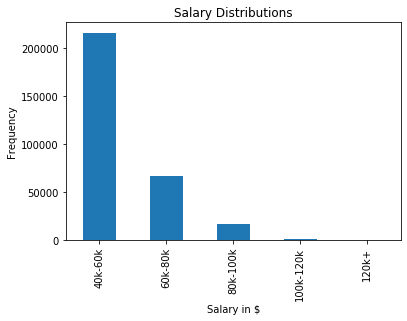

In [4]:
salary_count.plot(kind="bar", legend=False)
plt.xlabel("Salary in $")
plt.ylabel("Frequency")
plt.title("Salary Distributions")
plt.show()

In [5]:
merge1 = employees.merge(titles, left_on='emp_title_id', right_on='title_id',
          suffixes=('_left', '_right'))
merge1.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,473302,s0001,2053-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff
1,421786,s0001,2057-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff
2,273487,s0001,2057-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff
3,246449,s0001,2058-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff
4,48085,s0001,2064-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff


In [6]:
merge2 = merge1.merge(salaries, left_on='emp_no', right_on='emp_no',
          suffixes=('_left', '_right'))
merge2.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title,salary,Salary Group
0,473302,s0001,2053-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff,40000,40k-60k
1,421786,s0001,2057-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff,40000,40k-60k
2,273487,s0001,2057-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff,56087,40k-60k
3,246449,s0001,2058-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff,87084,80k-100k
4,48085,s0001,2064-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff,63016,60k-80k


In [7]:
salaries_by_title = merge2.groupby('title')['salary'].mean()
salaries_by_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

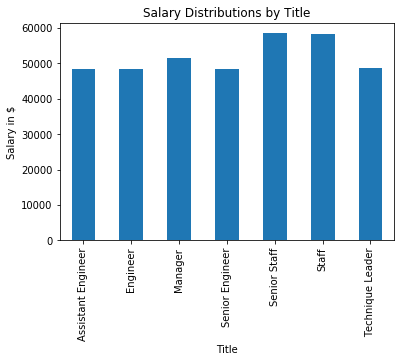

In [8]:
salaries_by_title.plot(kind="bar", legend=False)
plt.xlabel("Title")
plt.ylabel("Salary in $")
plt.title("Salary Distributions by Title")
plt.show()